In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df['Experience']=df['Experience'].abs()

In [10]:
df['Experience'].value_counts()

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: count, dtype: int64

In [11]:
loan_distribution = df['Personal Loan'].value_counts()

Personal Loan Column Distribution:
Personal Loan
0    4520
1     480
Name: count, dtype: int64

Comment on Class Distribution:
The distribution of classes in the 'Personal Loan' column is as follows:
0: 4520 instances
1: 480 instances


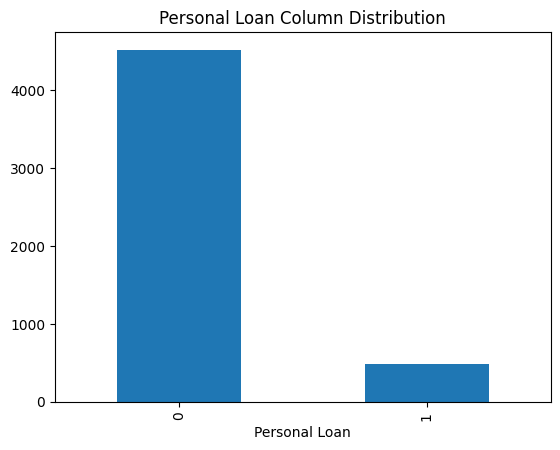

In [12]:
print("Personal Loan Column Distribution:")
print(loan_distribution)

# Comment on the class distribution
print("\nComment on Class Distribution:")
print("The distribution of classes in the 'Personal Loan' column is as follows:")
for class_label, count in loan_distribution.items():
    print(f"{class_label}: {count} instances")

# Visualize the distribution using a bar plot
loan_distribution.plot(kind='bar', title='Personal Loan Column Distribution')
plt.show()

In [13]:
# Separate the target column 'Personal Loan' into y
y=df['Personal Loan']
# Separate the rest of the columns into X
x=df.drop('Personal Loan',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Split the dataset into 70% train and 30% test
x_test, x_train, y_test, y_train=train_test_split(x,y, test_size=0.3, random_state=42)

In [16]:
print(x_test)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1840  1841   55          25      23     93106       4    0.4          3   
2115  2116   57          31      30     95070       3    1.4          1   
4437  4438   63          38      63     92507       2    1.5          1   
1146  1147   31           7      71     90034       1    0.1          1   
2486  2487   61          36     130     92717       1    1.3          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4426  4427   33           8     140     95814       1    4.6          1   
466    467   25           0      13     91342       2    0.9          3   
3092  3093   43          18     113     90036       2    0.4          1   
3772  3773   35          10     152     94112       2    3.0          1   
860    861   57          31      30     95841       2    0.7          2   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
1840        88                

In [17]:
print(x_train)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1501  1502   30           4      35     92130       2    0.3          2   
2586  2587   47          23     149     92675       4    6.1          1   
2653  2654   30           5     121     94555       2    3.1          1   
1055  1056   31           6      62     95630       1    1.0          1   
705    706   62          36      30     94720       3    0.7          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
3563  3564   53          27     139     94998       1    0.9          3   
1538  1539   55          30      34     95820       4    0.1          3   
1837  1838   43          18     103     90089       3    1.0          1   
2380  2381   40          16      50     92606       2    0.6          3   
1912  1913   42          16     191     94304       3    4.8          2   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
1501         0                

In [18]:
print(y_test)

1840    0
2115    0
4437    0
1146    0
2486    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Personal Loan, Length: 3500, dtype: int64


In [19]:
print(y_train)

1501    0
2586    1
2653    0
1055    0
705     0
       ..
3563    1
1538    0
1837    0
2380    0
1912    1
Name: Personal Loan, Length: 1500, dtype: int64


In [20]:
#Standardize the columns using the z-score scaling approach
scaler=StandardScaler()

In [22]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [23]:
print("Training data shape:", X_train_scaled.shape)
print("Test data shape:", X_test_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (1500, 13)
Test data shape: (3500, 13)
Training labels shape: (1500,)
Test labels shape: (3500,)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

In [26]:
# Train the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [27]:
# Predict on the training set
train_predictions = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_predictions)

In [28]:
# Predict on the test set
test_predictions = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)

In [29]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9513
Test Accuracy: 0.9506


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [32]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[3126   51]
 [ 122  201]]


In [33]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3177
           1       0.80      0.62      0.70       323

    accuracy                           0.95      3500
   macro avg       0.88      0.80      0.84      3500
weighted avg       0.95      0.95      0.95      3500



In [ ]:
# Accuracy: The overall accuracy of the model on the test set indicates how often the model is correct. It gives an overall idea of model performance but should be considered alongside other metrics.
# Precision and Recall: These metrics provide insights into the model's ability to correctly identify positive cases (customers accepting personal loans) and negative cases (customers not accepting). Precision measures the proportion of true positives among all positive predictions, while recall measures the proportion of true positives that were correctly predicted.
# F1-score: The harmonic mean of precision and recall provides a balanced measure that takes both false positives and false negatives into account.
# Confusion Matrix: By examining the confusion matrix, we can see where the model is making errors. For instance, if the model has high false positives, it might be incorrectly predicting customers accepting personal loans when they actually don't.